In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sounddevice as sd
import math
%matplotlib inline

In [2]:
cd = np.loadtxt('corrupted_speech.txt')
music = np.loadtxt('music.txt')
fs = 22000
#cd = cd.reshape(280223,1)
#music = music.reshape(280223,1)
N = cd.shape[0]
ml = music.shape[0]
#print(type(N))
#print(music[0:5])
#sd.play(music,fs)

50 finish
100 finish
150 finish
200 finish
250 finish
300 finish
350 finish
400 finish


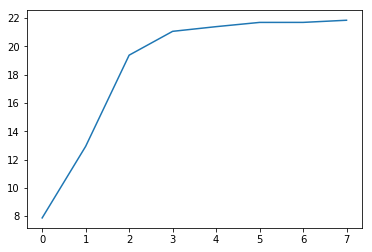

In [3]:
#define parameters. filter order m, step size step_s and weight_co    
ss = 0.0005
ERLE = []
# weight_co is m*1
for m in range(50,401,50):
    weight_co = np.zeros((m,1))
#print(weight_co)
# create another variables which wil be used in future
    weight_track = np.zeros((m,N-m))
#build new input matrix based on m
# caculate eigenvalue and auto-corrilation matrix
    x = np.zeros((m,N-m))
    md = cd[m:N]
    for i in range(0,(N-m)):
        temp = music[i:i+m]
        x[:,i] = temp[::-1]
    R = (x@x.T)/(N-m)
    value,vector = np.linalg.eig(R)
    max_ev = max(value)
# step 2 training w
    e_train = np.zeros(N-m)
    J_train = np.zeros(N-m)
    ERLE_d = np.zeros(N-m)
    ERLE_e = np.zeros(N-m)
    J = np.zeros(20)
    lc = []
    for iter in range(0,20):
        learn_curve = 0
        for i in range(0,N-m):
            y = weight_co.T@x[:,i]
    #print(y)
            e_train[i] = md[i]-y
    #print(e[i])
            error = e_train[i]
            ERLE_d[i] = md[i]**2
            ERLE_e[i] = error**2
            J_train[i] = error**2
            learn_curve = learn_curve+error**2
            a = 2*ss*e_train[i]
            weight_co[:,0] = weight_co[:,0] + a*x[:,i]
            weight_track[:,i] = weight_co[:,0]
        lc.append(sum(J_train))
    ERLE.append(10*math.log10(sum(ERLE_d)/sum(ERLE_e)))
    print(m,'finish')
plt.plot(ERLE)  

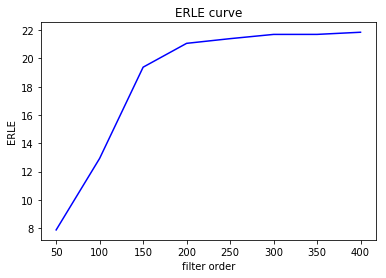

In [5]:
axis = np.arange(50,401,50)
plt.plot(axis,ERLE,'b')
plt.title('ERLE curve')
plt.xlabel('filter order')
plt.ylabel('ERLE')

In [82]:
print(lc)

[2710.0991756049325, 2657.718864825717, 2662.8112068562441, 2665.8839857095991, 2667.8123143550984, 2669.0290170853173, 2669.8033072039934, 2670.3034165049612, 2670.6321260344671, 2670.8522348760066, 2671.0023872355086, 2671.1066218749493, 2671.1801180253829, 2671.2326387938356, 2671.2705922385435, 2671.2982711232003, 2671.318607121691, 2671.3336373259594, 2671.3447986681899, 2671.3531178010535]


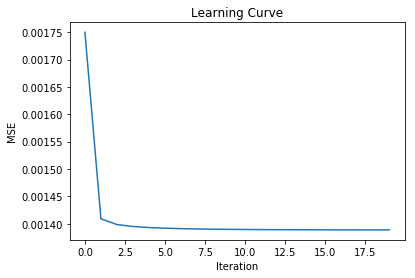

In [6]:
for i in range(0,20):
    lc[i]=lc[i]/(N-m)
lc_x_axis = np.arange(0,20,1)
plt.plot(lc_x_axis,lc)
plt.title('Learning Curve')
plt.xlabel('Iteration')
plt.ylabel('MSE')